In [1]:
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf

#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

In [5]:

yf.pdr_override()
y_symbols = ['SCHAND.NS', 'TATAPOWER.NS', 'ITC.NS']
from datetime import datetime
startdate = datetime(2022,12,1)
enddate = datetime(2022,12,15)
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

[*********************100%***********************]  3 of 3 completed


In [8]:
data

Adj Close                                Close              \
                ITC.NS   SCHAND.NS TATAPOWER.NS      ITC.NS   SCHAND.NS   
Date                                                                      
2022-12-01  339.549988  195.949997   224.850006  339.549988  195.949997   
2022-12-02  337.149994  196.600006   225.250000  337.149994  196.600006   
2022-12-05  336.750000  191.050003   224.199997  336.750000  191.050003   
2022-12-06  337.299988  196.399994   228.800003  337.299988  196.399994   
2022-12-07  340.100006  187.350006   225.850006  340.100006  187.350006   
2022-12-08  338.399994  181.850006   225.050003  338.399994  181.850006   
2022-12-09  341.399994  176.899994   219.399994  341.399994  176.899994   
2022-12-12  343.200012  177.350006   217.699997  343.200012  177.350006   
2022-12-13  345.600006  178.449997   218.850006  345.600006  178.449997   
2022-12-14  345.399994  179.149994   222.699997  345.399994  179.149994   

                               High                                  Low  \
           TATAPOWER.NS      ITC.NS   SCHAND.NS TATAPOWER.NS      ITC.NS   
Date                                                                       
2022-12-01   224.850006  341.700012  201.899994   227.149994  336.799988   
2022-12-02   225.250000  340.799988  198.649994   226.350006  336.750000   
2022-12-05   224.199997  338.850006  200.899994   225.850006  334.149994   
2022-12-06   228.800003  338.200012  197.449997   230.300003  334.100006   
2022-12-07   225.850006  341.500000  198.000000   229.600006  336.649994   
2022-12-08   225.050003  342.149994  187.850006   227.300003  337.500000   
2022-12-09   219.399994  342.500000  185.350006   226.500000  338.000000   
2022-12-12   217.699997  344.000000  185.350006   219.750000  340.100006   
2022-12-13   218.850006  346.000000  184.600006   220.300003  342.399994   
2022-12-14   222.699997  347.350006  181.199997   223.199997  343.750000   

                                           Open                           \
             SCHAND.NS TATAPOWER.NS      ITC.NS   SCHAND.NS TATAPOWER.NS   
Date                                                                       
2022-12-01  190.000000   223.600006  341.700012  191.600006   225.250000   
2022-12-02  193.100006   223.850006  339.350006  196.000000   225.449997   
2022-12-05  183.000000   222.350006  337.649994  200.850006   225.250000   
2022-12-06  190.350006   223.500000  334.100006  191.000000   224.199997   
2022-12-07  184.000000   225.399994  338.500000  198.000000   228.800003   
2022-12-08  178.550003   224.800003  340.200012  186.000000   226.000000   
2022-12-09  175.000000   217.500000  339.750000  183.899994   225.899994   
2022-12-12  173.300003   215.699997  341.000000  177.750000   219.750000   
2022-12-13  177.600006   217.800003  344.500000  179.350006   218.800003   
2022-12-14  178.000000   219.399994  346.000000  180.449997   219.800003   

              Volume                         
              ITC.NS SCHAND.NS TATAPOWER.NS  
Date                                         
2022-12-01  16630417    544485      7833074  
2022-12-02   8388835    122126      7223274  
2022-12-05   9716390    107294     10750610  
2022-12-06   6327430    102911     20071039  
2022-12-07   9813208    122772      7548312  
2022-12-08   6200447    114147      7507975  
2022-12-09   8132228    179660     13087278  
2022-12-12  11214662    133507      8858525  
2022-12-13  10693426     74873      7265105  
2022-12-14   7379878     32085      9179593

In [5]:
pip install quandl

     |████████████████████████████████| 52 kB 3.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install fix_yahoo_finance

  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7075 sha256=c3ae0d0c6975e94f5a19fd0aef7746d8230e2d39994a7ee3ddd31e7aa73bdbdb
  Stored in directory: /Users/mohitkumar/Library/Caches/pip/wheels/18/2c/e3/1bd1cfc353b5d4059e245f59277f1ffb0dd11677828048039a
Successfully built fix-yahoo-finance
Note: you may need to restart the kernel to use updated packages.


In [6]:

pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316

  Cloning https://github.com/raphi6/pandas-datareader.git (to revision ea66d6b981554f9d0262038aef2106dda7138316) to /private/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/pip-req-build-52_ao6l_
  Running command git clone -q https://github.com/raphi6/pandas-datareader.git /private/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/pip-req-build-52_ao6l_
  xcode-select: note: no developer tools were found at '/Applications/Xcode.app', requesting install. Choose an option in the dialog to download the command line developer tools.
ERROR: Command errored out with exit status 1: git clone -q https://github.com/raphi6/pandas-datareader.git /private/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/pip-req-build-52_ao6l_ Check the logs for full command output.
Note: you may need to restart the kernel to use updated packages.


In [103]:
# Read the data from Yahoo
df= pdr.get_data_yahoo('SPY', '2012-01-01', '2017-01-01')
print(df.columns)
df = df.dropna()
df = df[['Open', 'High', 'Low','Close','Adj Close']]
df.head()

[*********************100%***********************]  1 of 1 completed
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Open        High         Low       Close   Adj Close
Date                                                                  
2012-01-03  127.760002  128.380005  127.430000  127.500000  103.596169
2012-01-04  127.199997  127.809998  126.709999  127.699997  103.758713
2012-01-05  127.010002  128.229996  126.430000  128.039993  104.034950
2012-01-06  128.199997  128.220001  127.290001  127.709999  103.766838
2012-01-09  128.000000  128.179993  127.410004  128.020004  104.018707

In [108]:
# Predictor variables
df['Open-Close']= df.Open -df.Close
df['High-Low']  = df.High - df.Low
df['High_Low'] = df.High/df.Low
df =df.dropna()
X= df[['Open-Close','High-Low','High_Low', 'Adj Close']]
#X.head()
#X= df[['Open', 'High', 'Low','Close','Adj Close']]
X.head()

Open-Close  High-Low  High_Low   Adj Close
Date                                                  
2012-01-03    0.260002  0.950005  1.007455  103.596169
2012-01-04   -0.500000  1.099998  1.008681  103.758713
2012-01-05   -1.029991  1.799995  1.014237  104.034950
2012-01-06    0.489998  0.930000  1.007306  103.766838
2012-01-09   -0.020004  0.769989  1.006043  104.018707

In [109]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03  127.760002  128.380005  127.430000  127.500000  103.596169   
2012-01-04  127.199997  127.809998  126.709999  127.699997  103.758713   
2012-01-05  127.010002  128.229996  126.430000  128.039993  104.034950   
2012-01-06  128.199997  128.220001  127.290001  127.709999  103.766838   
2012-01-09  128.000000  128.179993  127.410004  128.020004  104.018707   

            Open-Close  High-Low  High_Low  
Date                                        
2012-01-03    0.260002  0.950005  1.007455  
2012-01-04   -0.500000  1.099998  1.008681  
2012-01-05   -1.029991  1.799995  1.014237  
2012-01-06    0.489998  0.930000  1.007306  
2012-01-09   -0.020004  0.769989  1.006043

In [98]:
1258*0.7

880.5999999999999

In [110]:
# Target variable
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [115]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03  127.760002  128.380005  127.430000  127.500000  103.596169   
2012-01-04  127.199997  127.809998  126.709999  127.699997  103.758713   
2012-01-05  127.010002  128.229996  126.430000  128.039993  104.034950   
2012-01-06  128.199997  128.220001  127.290001  127.709999  103.766838   
2012-01-09  128.000000  128.179993  127.410004  128.020004  104.018707   

            Open-Close  High-Low  High_Low  
Date                                        
2012-01-03    0.260002  0.950005  1.007455  
2012-01-04   -0.500000  1.099998  1.008681  
2012-01-05   -1.029991  1.799995  1.014237  
2012-01-06    0.489998  0.930000  1.007306  
2012-01-09   -0.020004  0.769989  1.006043

In [113]:
Y

array([ 1,  1, -1, ..., -1, -1, -1])

In [111]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [112]:
# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=10)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.3f' %accuracy_train)
print ('Test_data Accuracy: %.3f' %accuracy_test)

Train_data Accuracy: 0.660
Test_data Accuracy: 0.540


In [51]:
knn.predict([[100,700,5]])

/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([-1])

In [40]:
# Instantiate KNN learning model(k=15)
i=11
for i in range(3,22):
    knn = KNeighborsClassifier(n_neighbors=i)

    # fit the model
    knn.fit(X_train, Y_train)

    # Accuracy Score
    accuracy_test = accuracy_score(Y_test, knn.predict(X_test))
    print("no. of n_neighbors",i)
    print ('Test_data Accuracy: %.2f' %accuracy_test)

no. of n_neighbors 3
Test_data Accuracy: 0.54
no. of n_neighbors 4
Test_data Accuracy: 0.53
no. of n_neighbors 5
Test_data Accuracy: 0.50
no. of n_neighbors 6
Test_data Accuracy: 0.53
no. of n_neighbors 7
Test_data Accuracy: 0.53
no. of n_neighbors 8
Test_data Accuracy: 0.53
no. of n_neighbors 9
Test_data Accuracy: 0.52
no. of n_neighbors 10
Test_data Accuracy: 0.54
no. of n_neighbors 11
Test_data Accuracy: 0.53
no. of n_neighbors 12
Test_data Accuracy: 0.52
no. of n_neighbors 13
Test_data Accuracy: 0.54
no. of n_neighbors 14
Test_data Accuracy: 0.53
no. of n_neighbors 15
Test_data Accuracy: 0.53
no. of n_neighbors 16
Test_data Accuracy: 0.53
no. of n_neighbors 17
Test_data Accuracy: 0.52
no. of n_neighbors 18
Test_data Accuracy: 0.54
no. of n_neighbors 19
Test_data Accuracy: 0.52
no. of n_neighbors 20
Test_data Accuracy: 0.51
no. of n_neighbors 21
Test_data Accuracy: 0.52


In [27]:
knn.predict([[100,0.2]])

/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

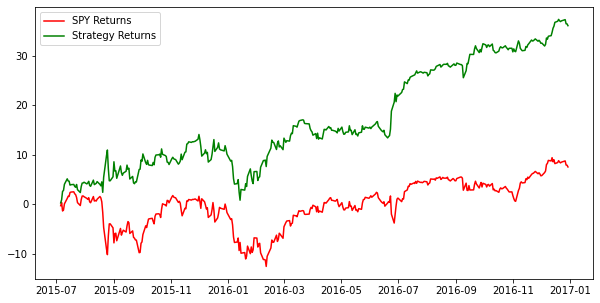

In [9]:
# Predicted Signal
df['Predicted_Signal'] = knn.predict(X)

# SPY Cumulative Returns
df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_returns = df[split:]['SPY_returns'].cumsum()*100

# Cumulative Strategy Returns 
df['Startegy_returns'] = df['SPY_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [10]:
# Calculate Sharpe ratio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 1.63
